# Classification models

## 1. Logistic regression classification methods

In this section, we'll use a logistic regression methods as a main core of our final classification algorithms.
Logistic regression is based on decision taken by the algorithm to put example into either 0 or 1 groups. 
In our case :  

* **Group 1 :** banknote is considered as conform
* **Groupe 0 :** banknote is a fraud  

Classification decision taken by the algorithms is based on the results of the comparison between linear equation value and a given threshold. A linear equation looks like : `y = theta_0 + theta_1*x_1 + theta_2 * x_2 ... + theta_n * x_n ` where **X** and **theta** are respectively the feature vector and parametric vector.

- **X** is given by each example of our population as an input value
- **Theta** is set up with the cost function minimize value


Finally, for a given example, logistic regression algorithm will evaluate the following inequation :  `theta_0 + theta_1*x_1 + theta_2 * x_2 ... + theta_n * x_n > threshold` in order to classify input (random banknote) as conform or fraud




In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import seaborn as sns
from matplotlib import pyplot as plt

### 1.1 Models feeding

In [2]:
# data_input : path to input csv file


def ONCFM_Logistic_model(path_data_input, caracteristics_display=False, csv_saving = None):
    


    # data set loading from preprocessing notebook results

    data_set = pd.read_csv("../Data_set/imputed_data.csv")

    # Rescaling the data_set

    features = data_set.columns[1:]
    y_label = data_set.columns[0]

    # Standardiser les inputs si les données d'apprentissage sont standardisées
    
    #rescaler = preprocessing.StandardScaler()
    #data_standardized = rescaler.fit_transform(data_set[features])
    #data_standardized_pd = pd.DataFrame(data_standardized, columns = features)
    #data_standardized = pd.concat([data_standardized_pd, data_set[y_label]], axis=1)

    # splitting data_set into training and testing set

    X = data_set[features]
    y = data_set[y_label]


    X_train, X_test ,y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=100)


    # Regression logistic models
    # 'ovr' means binary classification
    # 'liblinear' faster with small data_set
    # 'balanced' Auto balanced binary classes methods

    lr = LogisticRegression(multi_class='ovr', solver='liblinear', class_weight='balanced').fit(X_train,y_train)
    
    if caracteristics_display:

        # Model Description

        print("\n \t\t\t ----- \033[1mTHETA PARAMETERS MATRIX\033[0m ----- \n")
        print("\n\033[1mFEATURE NAME\033[0m : \033[1mWEIGHT\033[0m \n")
        for feature,coeff in zip(features, (lr.coef_.flatten())) :
            print("\033[1m{}\033[0m : {}".format(feature, coeff))

        # Model performances

        y_predict = lr.predict(X_test)
        print("\n")
        print("\t\t\t ----- \033[1mCONFUSION MATRIX\033[0m ----- \n")
        ConfusionMatrixDisplay.from_predictions(y_test,y_predict)
        plt.show()
        print("\t\t\t ----- \033[1mMODEL PERFORMANCES\033[0m ----- \n")
        print(classification_report(y_test,y_predict))

        # Model prediction on input_data
    
    input_data = pd.read_csv(path_data_input, sep=",")
    predicted_data = lr.predict(input_data[features])
    input_data["predicted"] = predicted_data
    
    if csv_saving is None:
         return input_data
    else:
        input_data.to_csv()


 			 ----- THETA PARAMETERS MATRIX ----- 


FEATURE NAME : WEIGHT 

diagonal : -0.2616392858537752
height_left : -1.282496774212761
height_right : -1.9942793315932277
margin_low : -3.349283084941572
margin_up : -3.2844555063458465
length : 3.656810092558846


			 ----- CONFUSION MATRIX ----- 



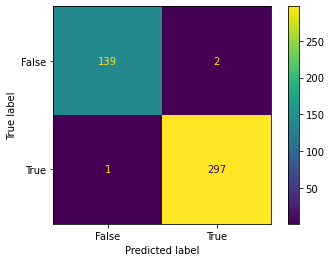

			 ----- MODEL PERFORMANCES ----- 

              precision    recall  f1-score   support

       False       0.99      0.99      0.99       141
        True       0.99      1.00      0.99       298

    accuracy                           0.99       439
   macro avg       0.99      0.99      0.99       439
weighted avg       0.99      0.99      0.99       439



,diagonal,height_left,height_right,margin_low,margin_up,length,predicted
0,162.21,102.86,102.95,3.92,2.19,110.83,True
1,190.81,134.86,114.95,9.00,5.30,112.83,False
2,162.81,104.86,104.95,4.52,2.89,112.83,True


In [3]:
ONCFM_Logistic_model("../Data/data_to_predict.csv", True)

## 1.2 Tested Model on outside data

In [5]:
ONCFM_Logistic_model("../Data/billets_production.csv")

,diagonal,height_left,height_right,margin_low,margin_up,length,id,predicted
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,False
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,False
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,False
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,True
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,True


In [8]:
res = ONCFM_Logistic_model("../Data/billets_production.csv")

In [9]:
label_0 = res[res["predicted"]]["id"].values
label_1 = res[~res["predicted"]]["id"].values

In [10]:
print("\033[1m{}\033[0m banknote's ids are fraud whereas \033[1m{}\033[0m ids are conform".format(label_0,label_1))

['A_4' 'A_5'] banknote's ids are fraud whereas ['A_1' 'A_2' 'A_3'] ids are conform


## 2. KMeans

In [11]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# 

## 2.1 Both Elbow and Silhouette score to determine k

In [47]:
# import initial data set from preprocessing notebook

initial_data_set = pd.read_csv("../Data_set/imputed_data.csv")

# splitting data into training and testing set

features = initial_data_set.columns[1:]
y = initial_data_set.columns[0]

X_data = initial_data_set[features]
y_data = initial_data_set[y]


x_train,x_test,y_train,y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=100)


# fitting clustering models

kmodel = KMeans(n_clusters=2)
kmodel.fit(x_train)

print(pd.Series(kmodel.labels_).value_counts())
print(y_train.value_counts())

# Cluster n°0 : Conform banknote
# Cluster n°1 : Fake banknote

0    687
1    337
dtype: int64
True     673
False    351
Name: is_genuine, dtype: int64


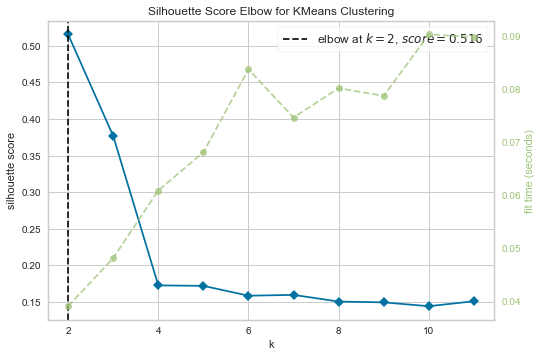

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [18]:
model = KMeans()
visualizer = KElbowVisualizer(model,k=(2,12), metric="silhouette")

visualizer.fit(x_train)
visualizer.show()

**Note** : 
* Elbow results recommend to set up **k=6** 
* Silhouette score recommend only **k=2** for optimal fitting

## 2.2 Following Silhouette score with k=2



			 ----- CONFUSION MATRIX ----- 



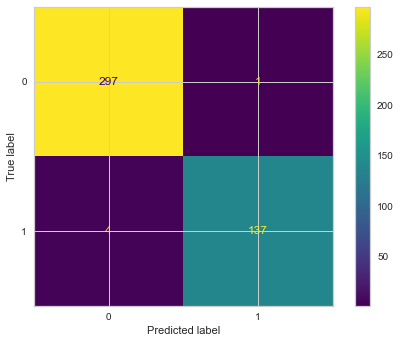

			 ----- MODEL PERFORMANCES ----- 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       298
           1       0.99      0.97      0.98       141

    accuracy                           0.99       439
   macro avg       0.99      0.98      0.99       439
weighted avg       0.99      0.99      0.99       439



In [48]:
kmodel = KMeans(n_clusters=2)
kmodel.fit(x_train)

# Testing the model

y_predict = kmodel.predict(x_test)

y_test.replace({False:1,
               True:0}, inplace=True)
# Model performances 

print("\n")
print("\t\t\t ----- \033[1mCONFUSION MATRIX\033[0m ----- \n")
ConfusionMatrixDisplay.from_predictions(y_test,y_predict)
plt.show()
print("\t\t\t ----- \033[1mMODEL PERFORMANCES\033[0m ----- \n")
print(classification_report(y_test,y_predict))

## 2.3 Following Elbow score

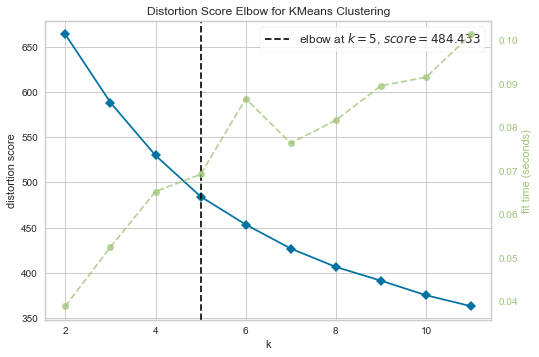

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
model = KMeans()
visualizer = KElbowVisualizer(model,k=(2,12))

visualizer.fit(x_train)
visualizer.show()

In [26]:
kmodel = KMeans(n_clusters=5)
kmodel.fit(x_train)

# Centroid

kmodel.cluster_centers_
kmodel.labels_

array([1, 4, 1, ..., 1, 4, 4], dtype=int32)

In [27]:
# Cluster interpretation

data_label = pd.DataFrame(np.array([kmodel.labels_,y_train]).transpose(), columns=["k_label","y_label"])
cluster_prop = data_label.groupby(by=["k_label","y_label"]).agg({"y_label" : "count"}).rename(columns={"y_label" : "count"}).reset_index()

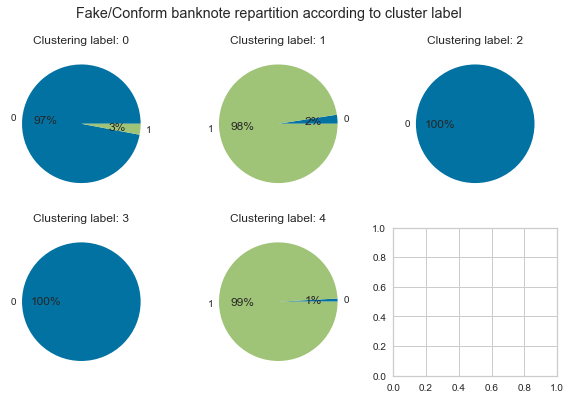

In [28]:
fig, ax = plt.subplots(2,3, figsize=(10,6))
index = [(i,j) for i in range(0,2) for j in range(0,3)]
i = 0
for k_label in np.unique(kmodel.labels_):
    
    data = cluster_prop[cluster_prop["k_label"] == k_label]
    x=data["count"]
    label = data["y_label"]
    ax[index[i]].pie(x, labels=label, autopct='%.0f%%')
    ax[index[i]].set_title("Clustering label: {}".format(i))
    i+=1
plt.suptitle("Fake/Conform banknote repartition according to cluster label")
plt.show()

In [53]:
# mapping cluster label with binary class
mapping_dict = {0 : [0,2,3] ,
               1 : [1,4]}

In [54]:
# predict value

y_predict = kmodel.predict(x_test)

In [55]:
# cluster labels applying mapping_dict

y_final_label = []
for y_label in y_predict:
    if y_label in mapping_dict[0]:
        y_final_label.append(0)
    elif y_label in mapping_dict[1]:
        y_final_label.append(1)
    else:
        y_final_label.append(np.nan)



			 ----- CONFUSION MATRIX ----- 



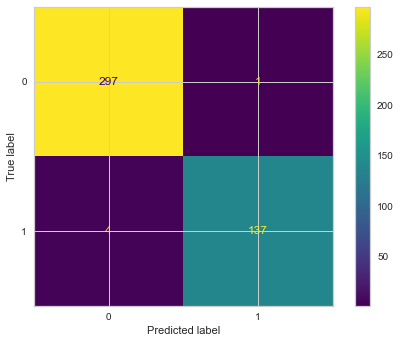

			 ----- MODEL PERFORMANCES ----- 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       298
           1       0.99      0.97      0.98       141

    accuracy                           0.99       439
   macro avg       0.99      0.98      0.99       439
weighted avg       0.99      0.99      0.99       439



In [56]:
# KMeans performances

print("\n")
print("\t\t\t ----- \033[1mCONFUSION MATRIX\033[0m ----- \n")
ConfusionMatrixDisplay.from_predictions(y_test,y_final_label)
plt.show()
print("\t\t\t ----- \033[1mMODEL PERFORMANCES\033[0m ----- \n")
print(classification_report(y_test,y_final_label))